Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


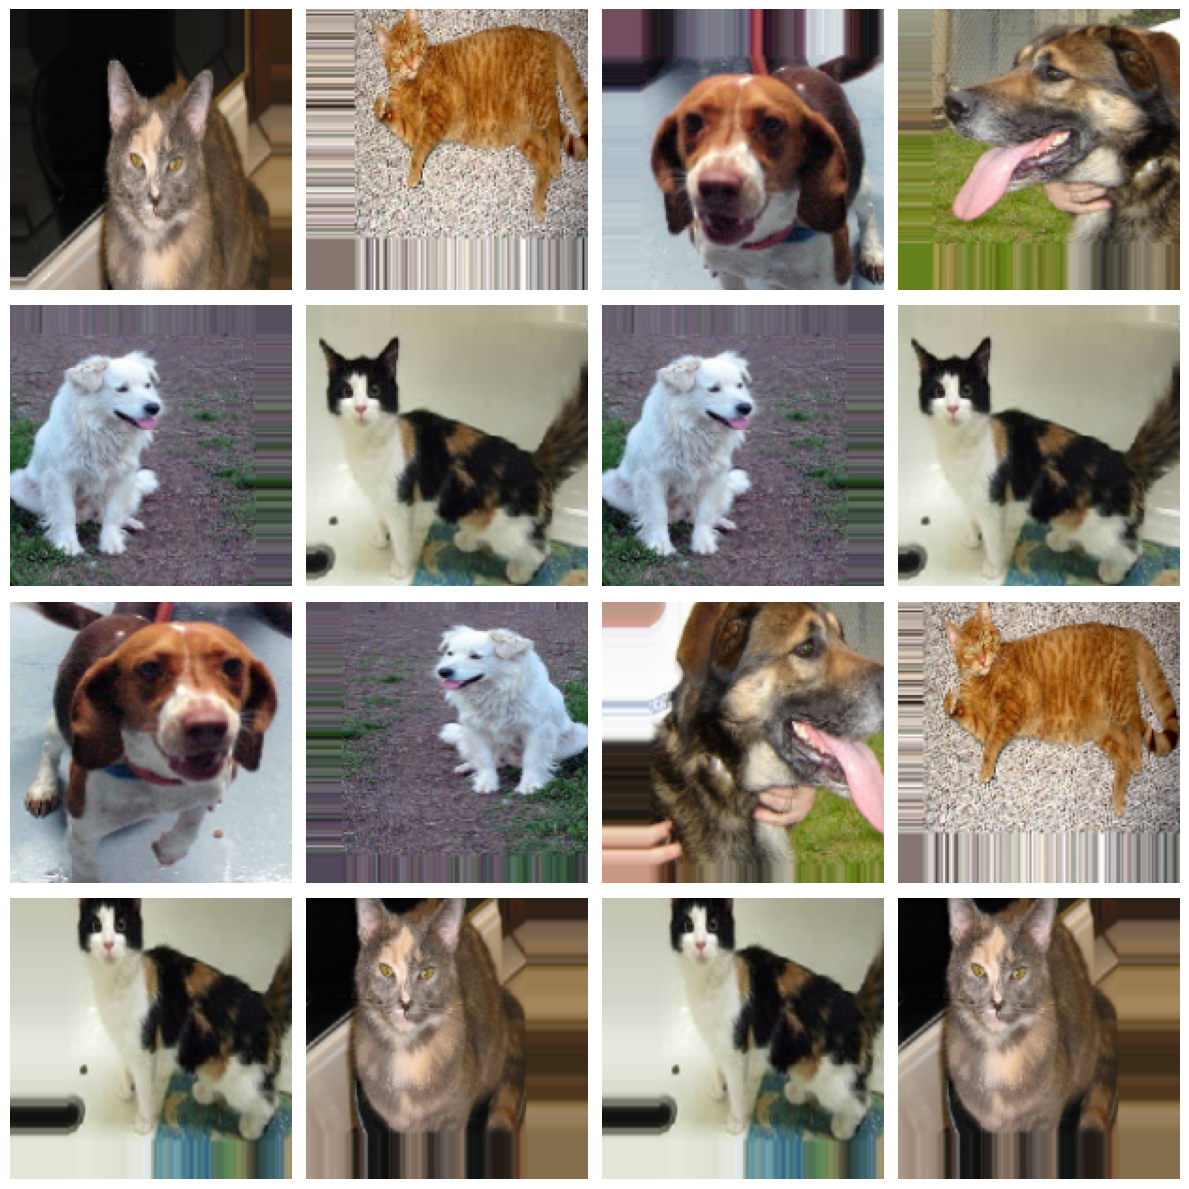

Found 6 images belonging to 2 classes.


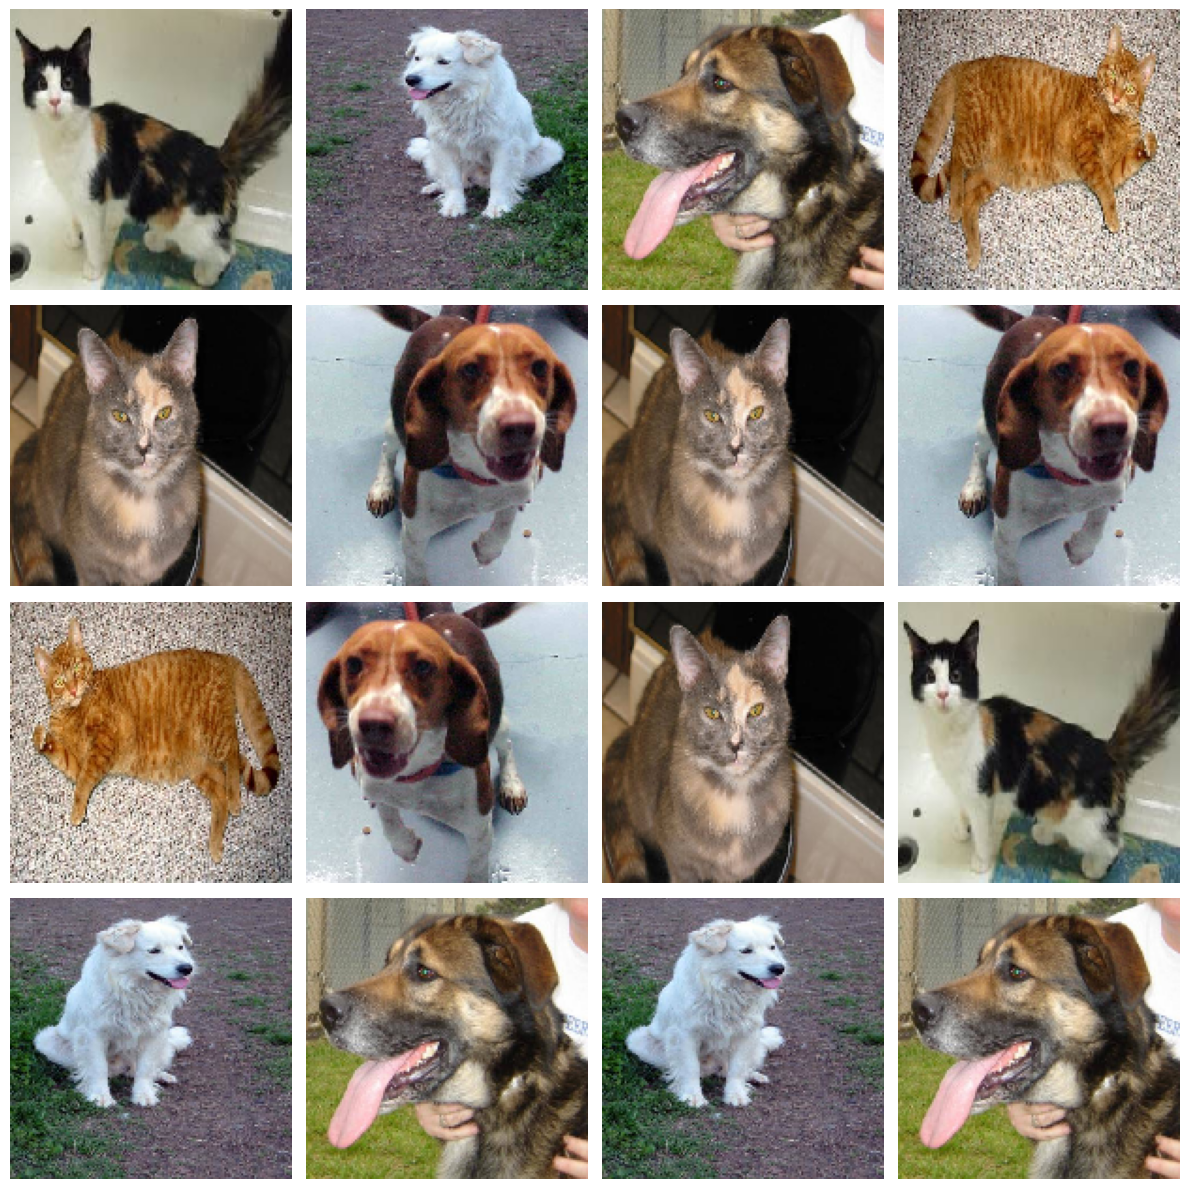

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

jf_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'images/sample-train/',
    target_size=(150, 150),
    save_to_dir='images/sample-confirm/'
)

# Display images and their variations in subplots
def display_augmented_images(generator, num_images, num_variations):
    fig, axes = plt.subplots(num_images, num_variations, figsize=(num_variations * 3, num_images * 3))
    for i in range(num_images):
        batch = next(generator)
        for j in range(num_variations):
            img = batch[0][j % len(batch[0])]  # Ensure index is within bounds
            ax = axes[i, j]
            ax.imshow(array_to_img(img))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display 4 images with 4 variations each from train_datagen
display_augmented_images(train_datagen.flow_from_directory(
    'images/sample-train/', target_size=(150, 150), batch_size=4), 4, 4)

# Display 4 images with 4 variations each from jf_datagen
display_augmented_images(jf_datagen.flow_from_directory(
    'images/sample-train/', target_size=(150, 150), batch_size=4), 4, 4)